In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Importing done here
dataset = load_iris()
X = dataset.data
y = dataset.target

In [3]:
# Trained and split 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
kf = KFold(n_splits=int(X.size/10), random_state=42, shuffle=True)

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),


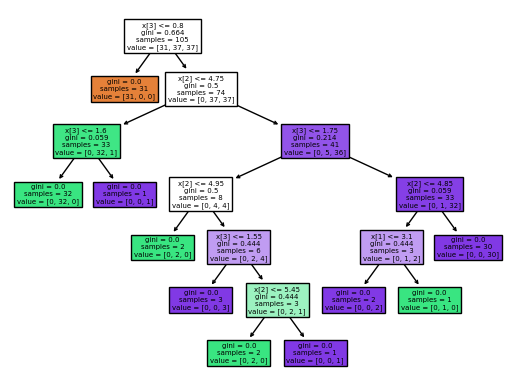

In [5]:
'''
Decision trees is a classification method that is used to perform multi-class classification


For training vectors x[i] which are real numbers and y is a vector of size of l
A decision tree recursively partitions the feature space such that the samples
with the same labels or similar target values are grouped together.

Let the data at node m be represented by Qm with Nm samples where N is the size of dataset. For each candidate
split Theta = (j, tm) consisting of feature j and the threshold tm partition the data into Qm^left(Theta) and Qm^right(Theta)

Where
Qm^left = The data at m is a tuple of (x, y) for x for feature j <= threshold at m
Qm^right = 
'''
# Visualizing the tree
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)

In [6]:
cv_scores = cross_val_score(clf, X, y, cv=kf)
print(cv_scores)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.66666667 0.66666667
 1.         0.5        1.         1.         0.5        1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.5        0.5        1.         1.         1.
 1.         1.         1.         1.         0.5        1.        ]


In [7]:
'''
Let C ∈ R^m,n
for C[i,j] = Observations of group i, predicted to be in group j
'''

'\nLet C ∈ R^m,n\nfor C[i,j] = Observations of group i, predicted to be in group j\n'

In [8]:
hypothesis = clf.predict(X_test)
print(accuracy_score(y_test, hypothesis))

1.0


In [9]:
confusion_mat = confusion_matrix(y_test, hypothesis)

In [10]:
import seaborn as sb

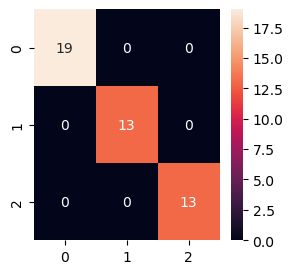

In [11]:
fig, ax = plt.subplots(figsize=(3,3))
sb.heatmap(confusion_mat, annot=True)
plt.show()

In [12]:
print(classification_report(hypothesis, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

